# Pas
   ### Lire les fichiers csv
       1. écrire un script qui vérifie si nous avons des fichiers csv dans le répertoire de travail
       2. écrire le script pour les charger
       3. enregistrez ce script en tant que module (utils.py)
       4. importez le module util et utilisez-le pour charger les fichiers csv en tant que trames de données
   ### Nettoyage des données
       1. vérifier les valeurs NaN les remplacer ou les supprimer, selon l'impact qu'elles auront sur nos résultats
       2. Vérification du type de données, chaque colonne doit avoir le même type de données(data type)
       3. nous pouvons ajouter des colonnes pertinentes et nécessaires (calculées ou dérivées d'autres colonnes)
       4. analyser et choisir la ou les colonnes qui seront utilisées pour relier et combiner nos dataframes
       5. combiner nos dataframes pour former un dataframe propre et organisé
       
  ### Etraction d'infos intéressante
       1. prix min, max et moyen
       2. durée min, max et moyenne par trajet
       3. différence de prix moyenne et durée selon le train, le bus et le covoiturage selon la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km)
      
 ### Conclusion

### Lire les fichiers csv

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

In [2]:
# nous vérifions si nous avons tous les fichiers requis dans le répertoire courant
ut.list_file_with_extension_cur_glob ('csv')

['cities.csv', 'providers.csv', 'stations.csv', 'ticket_data.csv']

In [3]:
#chargeons nos fichiers csv en tant que dateframe

cities = ut.read_dataset('cities.csv')
providers = ut.read_dataset('providers.csv')
stations = ut.read_dataset('stations.csv')
tickets = ut.read_dataset('ticket_data.csv')

### Nettoyage des données

In [4]:
# nous utilisons des fonctions prédéfinies dans nos modules utils
tickets_version_one = ut.replace_nan_for_middle_stations_and_other_companies_with_zero(tickets)
tickets_version_one

In [5]:
#changer le type de données des dates de chaîne en datetime (pour permettre l'utilisation pour obtenir facilement la durée du voyage)
tickets_version_two = ut.change_date_data_type_from_string_to_datetime(tickets_version_one)
tickets_version_two

In [6]:
#ajouter la durée du trajet en heures à l'aide des colonnes depart_ts et arrivée_ts
tickets_version_three = ut.add_trip_duration_column_to_ticket_data(tickets_version_two)
tickets_version_three

In [7]:
# colonnes de population contient des NaN, nous pouvons donc résoudre ce problème en :
# nous pourrions utiliser une API de population mais cela peut prendre plus de temps (mais nous n'avons qu'une semaine)
# remplacer le NaN par la valeur minimale dans la colonne population (c'est ce que nous allons faire)

cities['population'] = cities['population'].replace( np.nan, cities['population'].min())
cities

In [8]:
# on voit que le fournisseur peut être identifié de manière unique par :
# identifiant
# plus loin, nous voyons que le company_id est vu dans le dataframe du fournisseur comme id
# donc c'est ok pour éviter d'utiliser l'identifiant de l'entreprise (il ne contient pas non plus de valeurs int64)

clean_providers = ut.clean_up_providers_data_frame(providers)
clean_providers

## Fusionner les dataframes pour avoir un dataframe

In [9]:
# fusionner provider et tickets_data en utillisant company_id, car il est présent dans les deux tables
ticket_provider = pd.merge(left=tickets_version_three, right=clean_providers, left_on='company', right_on='id')
ticket_provider

In [10]:
# fusion des villes avec tickets_provider
ticket_provider_city = ut.join_city_to_ticket_data(cities, ticket_provider)
ticket_provider_city

In [11]:
# all_data contient des informations sur les quatre dataframes
all_data = ut.merge_ticket_to_station(ticket_provider_city, stations)
all_data

In [12]:
# ici, nous ajoutons la distance du trajet en km (en utilisant la longitude et la latitude des villes et des stations)
all_data_trip_distance = ut.distance(all_data, 'city')
# all_data_trip_distance = ut.distance(all_data, 'station')
all_data_trip_distance

## Etraction d'infos intéressante
    1. Prix min, moyen et max par trajet
    2. Durée min, max et moyenne par trajet
    3. Différence de prix moyen et durée selon le train, le bus et le covoit selon la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km)
    Le plus d’infos bonus

#### 1 Prix min, moyen et max par trajet(price_variations)

In [13]:
price_variations = ut.price_stats_per_travel(all_data_trip_distance)
price_variations

min    max          mean
o_city d_city                            
5      23      18600  22000  20320.000000
6      227      9860  13650  11755.000000
       504      2000   8920   4042.666667
       628      2600   3190   2797.500000
       845       700   2420    864.626866
...              ...    ...           ...
11938  126      3000   5350   4204.861111
12124  1064     6000   7900   6950.000000
12166  857      5300   5300   5300.000000
12190  639       600    850    688.888889
       8937     9800   9800   9800.000000

[1437 rows x 3 columns]

#### 2 Durée min, max et moyenne par trajet(duration_variations)

In [14]:
duration_variations = ut.duration_stats_per_travel(all_data_trip_distance)
duration_variations

##### 3 Différence de prix moyen et durée selon le train, le bus et le covoit selon la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km)

In [15]:
moin_de_200km = ut.distance_range(all_data_trip_distance,1)
moin_de_200km

#### here we shall plot some graphs for a better understanding

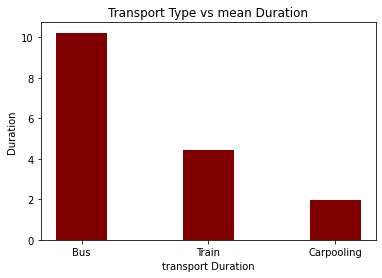

In [16]:

ut.get_barplot_of_transport_type_duration(moin_de_200km)

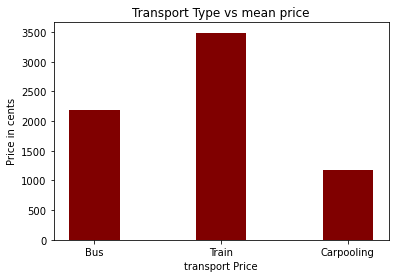

In [17]:
ut.get_barplot_of_transport_type_price(moin_de_200km)

In [18]:
entre200_et_800km = ut.distance_range(all_data_trip_distance,2)
entre200_et_800km

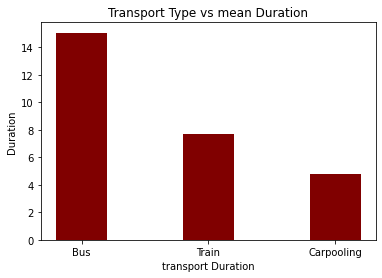

In [19]:
ut.get_barplot_of_transport_type_duration(entre200_et_800km)

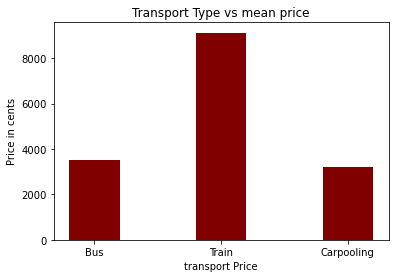

In [20]:
ut.get_barplot_of_transport_type_price(entre200_et_800km)

In [21]:
entre800_et_2000km = ut.distance_range(all_data_trip_distance,3)
entre800_et_2000km

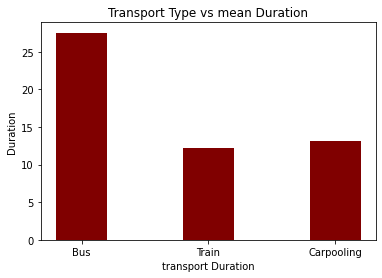

In [22]:
ut.get_barplot_of_transport_type_duration(entre800_et_2000km)

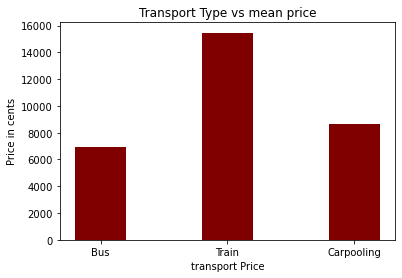

In [23]:
ut.get_barplot_of_transport_type_price(entre800_et_2000km)

In [24]:
ut.distance_range(all_data_trip_distance,4)

,city_distance_km,duration_in_hrs,price_in_cents,transport_type


## conclusion
    on peut conclure que le transport en train est le moyen de transport le plus cher mais le plus rapide sur les plus longues distances
    Le covoiturage est le moyen de transport le plus rapide pour les courtes et moyennes distances et aussi le moins cher pour les courtes et moyennes distances
    Le bus est le moyen de transport le plus lent et a son prix le plus bas pour les durées les plus longues